In [1]:
import numpy as np
import pandas as pd


In [2]:
data=pd.read_csv("data.csv")

In [3]:
data.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [4]:
data.shape

(3000, 2)

In [5]:
data.columns

Index(['email', 'label'], dtype='object')

In [6]:
data1=data.dropna()
data1.shape

(2999, 2)

In [7]:
data1["label"] = data1["label"].map({0: "HAM", 
                                    1: "SPAM"})
print(data1.head())

                                               email label
0   date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...   HAM
1  martin a posted tassos papadopoulos the greek ...   HAM
2  man threatens explosion in moscow thursday aug...   HAM
3  klez the virus that won t die already the most...   HAM
4   in adding cream to spaghetti carbonara which ...   HAM


C:\Users\HARI-S~1\AppData\Local\Temp/ipykernel_71688/2501055199.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1["label"] = data1["label"].map({0: "HAM",


In [8]:
data1.label.unique()

array(['HAM', 'SPAM'], dtype=object)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


Text(0.5, 1.0, 'Distribution of label')

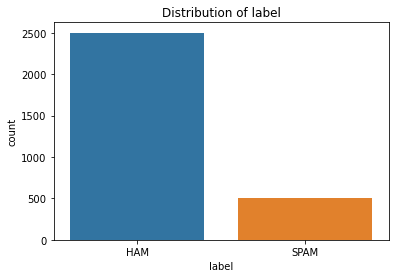

In [10]:
sns.countplot(x = "label", data=data1)
data1.loc[:, 'label'].value_counts()
plt.title('Distribution of label')

In [11]:
data1.label.value_counts()

HAM     2500
SPAM     499
Name: label, dtype: int64

In [12]:
import re
import string
import nltk
from nltk.corpus import stopwords
stopword=set(stopwords.words('english'))
stemmer = nltk.SnowballStemmer("english")

In [13]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["email"] = data["email"].apply(clean)

In [14]:
x = np.array(data1["email"])
y = np.array(data1["label"])

In [15]:
x

array([' date wed NUMBER aug NUMBER NUMBER NUMBER NUMBER NUMBER from chris garrigues cwg dated NUMBER NUMBERfaNUMBERd deepeddy com message id NUMBER NUMBER tmda deepeddy vircio com i can t reproduce this error for me it is very repeatable like every time without fail this is the debug log of the pick happening NUMBER NUMBER NUMBER pick_it exec pick inbox list lbrace lbrace subject ftp rbrace rbrace NUMBER NUMBER sequence mercury NUMBER NUMBER NUMBER exec pick inbox list lbrace lbrace subject ftp rbrace rbrace NUMBER NUMBER sequence mercury NUMBER NUMBER NUMBER ftoc_pickmsgs NUMBER hit NUMBER NUMBER NUMBER marking NUMBER hits NUMBER NUMBER NUMBER tkerror syntax error in expression int note if i run the pick command by hand delta pick inbox list lbrace lbrace subject ftp rbrace rbrace NUMBER NUMBER sequence mercury NUMBER hit that s where the NUMBER hit comes from obviously the version of nmh i m using is delta pick version pick nmh NUMBER NUMBER NUMBER compiled on URL at sun mar NUMBER 

In [16]:
y

array(['HAM', 'HAM', 'HAM', ..., 'SPAM', 'SPAM', 'SPAM'], dtype=object)

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [20]:
cv = CountVectorizer()
X = cv.fit_transform(x) # Fit the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [21]:
from xgboost import XGBClassifier
clf = XGBClassifier()
clf.fit(X_train,y_train)


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got ['HAM' 'SPAM']

In [22]:
pre=clf.predict(X_test)

NotFittedError: need to call fit or load_model beforehand

In [23]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pre)*100)

NameError: name 'pre' is not defined